##**Starting of the project,Importing the required data analysis tasks in python which is used for the further project**##

**Build machine Learning model(classification) for the insurance dataset listed below:**

**1) Do data ingestion (convert dataset into dataframe)**

**2) Do some pre-processing(if required), follow the steps for ML model creation.**

**3) Build multiple ML models(use different classification algorithms) and compare the accuracies.**

**4) Evaluate the model and write down the summarization of the process.**


**Importing the Dependencies**


In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##**Data Collection & Analysis**##


In [ ]:
#Load the data from csv file to panda data frame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
#first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [ ]:
#need some info about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##**Categorical features:-**##
- **Sex**
- **Smoker**
- **Region**

In [ ]:
#Checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##**DATA ANALYSIS**##


In [ ]:
#Statistical Measures of dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Group the data set by 'sex' , 'smoker' , 'region'**

<ipython-input-72-30bd7651d2c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


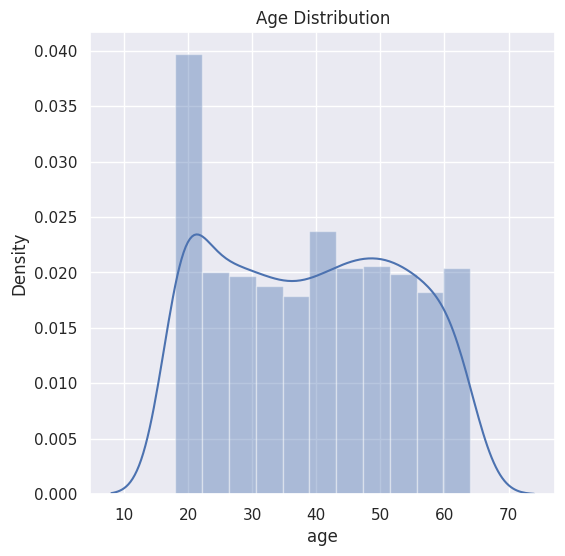

In [ ]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

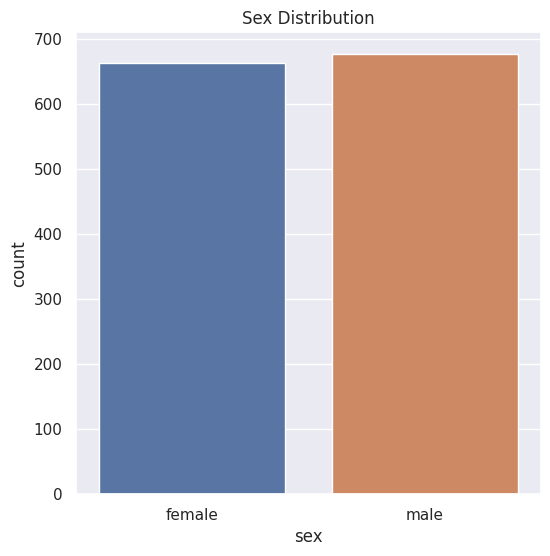

In [ ]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

<ipython-input-74-54fccb8c48d2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


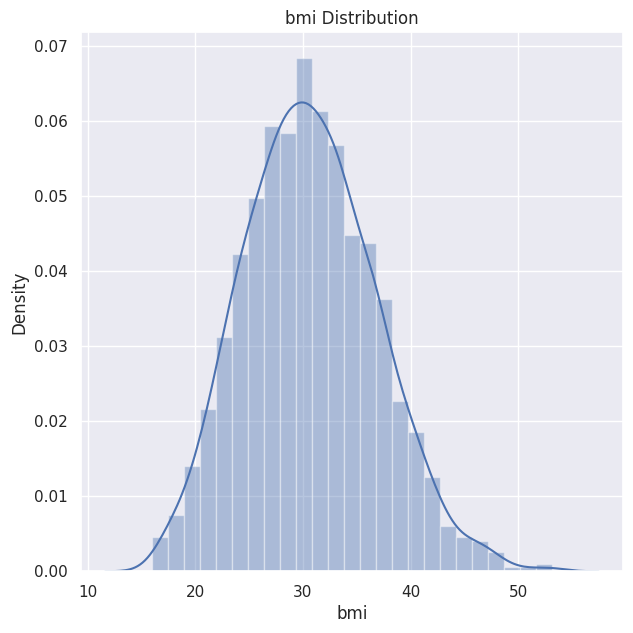

In [ ]:
#bmi distribution
plt.figure(figsize=(7,7))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi Distribution')
plt.show()

**Normal BMI Range --- 18.50 to 24.90**

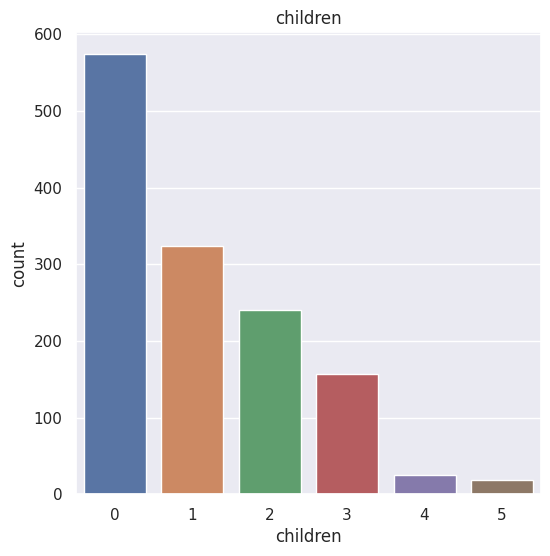

In [ ]:
#Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()



##**CHILDREN column for the the particular people.**##

In [ ]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

##**Smoker Column**##

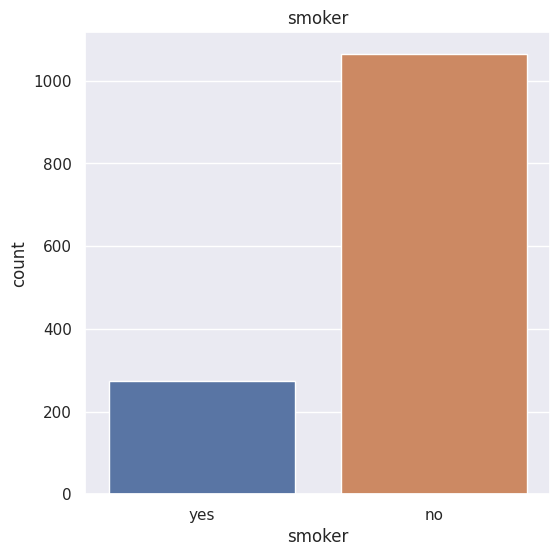

In [ ]:
#Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('smoker')
plt.show()

In [ ]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

##**REGION COLUMN**##

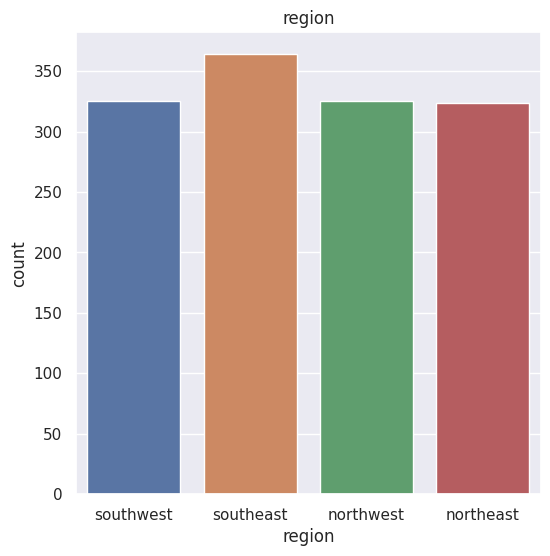

In [ ]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()

In [ ]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
insurance_dataset.isnull().values.any()

False

In [ ]:
insurance_dataset.isnull().values.sum()

0

<ipython-input-83-366b06851ae4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


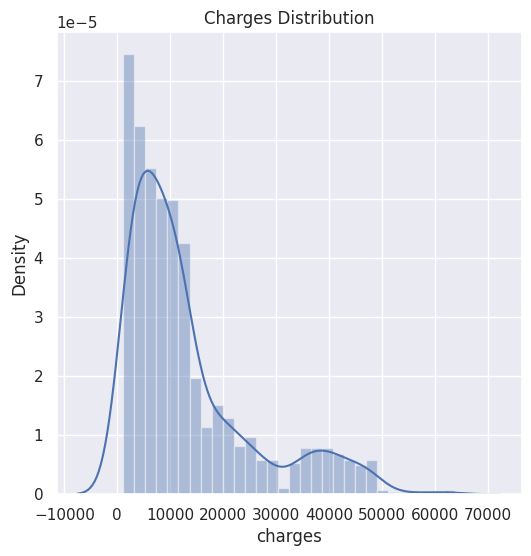

In [ ]:
#distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

##**DATA PRE-PROCESSING**##

**ENCODING CATEGORICAL FEATURES**





In [ ]:
#encoding sex column
insurance_dataset.replace({'sex' : {'male':0, 'female':1}}, inplace=True)

#encoding smoker column
insurance_dataset.replace({'smoker' : {'yes':0, 'no':1}}, inplace=True)

#encoding region column
insurance_dataset.replace({'region' : {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

##**Splitting the Features and Targets**##

In [ ]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


##**Splitting the Data into Training Data & Testing Data**##

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


##**Model Training**##

**Linear Regression**

In [ ]:
#loading the Linear Reggression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

##**Model Evaluation**##

In [ ]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
#R squared value (lies between 0 to 1`)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value :' , r2_train)

R squared value : 0.751505643411174


In [ ]:
#prediction on testing data
test_data_prediction = regressor.predict(X_test)

In [ ]:
#R squared value (lies between 0 to 1`)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value :' , r2_test)

R squared value : 0.7447273869684076


##**Building a Predictive System**##

In [ ]:
input_data = (31,1,25.74,0,1,0)

#changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##**SUMMARIZATION OF THE PROCESS**##

FIRST STEP in the process of the project is to import the required and necessary libraries


*   Then it reads in a table of insurance data from
  MyDrive and prints out the head of the medical insurance.

*   Next, the dataset name **insurance_dataset** is created for the further coding process.

*   After that, We will have the information,head file,missing variables,and filling with missing variables etc.., is done.

*   Next we check whether the null values are present or not and if present,then it will be filled by any other variable to avoid null value.

*   The code is used to read the data from a text file into a pandas DataFrame.

*   The shape property of the DataFrame shows that it has eleven columns:-  **age , sex ,	bmi ,	children ,	smoker ,	region ,	charges**

*   The code is trying to split the data given about the airbnb company into two groups:-

 1)training
 and
 2) testing.

*   The code above splits the data into two sets: X_train and y_train
*   The Linear Regression process is done before predicting the insurance value that has to be predicted.

*   It fits this model on the training data set and calculates its accuracy using test data set.

*   The code then creates a function that takes in both sets of data as input and outputs.The predicted values for each value in the test set.

*   Finally, the code is done by predicting the cost or insurance (in US Dollars) as it is the cost prediction of the **MEDICAL INSURANCE.**



##**FINALLY THE MINOR PROJECT IS DONE BY A.V.AMBAREESH**##